In [1]:
import networkx as nx
import pandas as pd
from pathlib import Path
from graph_tool import *
from graph_tool.centrality import betweenness
from graph_tool.clustering import local_clustering
from graph_tool.draw import prop_to_size, graph_draw, sfdp_layout, fruchterman_reingold_layout
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import binomtest

In [2]:
data_dir = "data"
list_names = []
for p in Path(data_dir).iterdir():
    if p.suffix == '.parquet':
        list_names.append(p)
list_names.sort()
for i, f in enumerate(list_names):
    print(i, f.stem)

0 df_edge_list_directed_users_combined_postings_replies_and_votes_to_postings_net
1 df_edge_list_directed_users_combined_postings_replies_and_votes_to_postings_net_and_follow_connections
2 df_edge_list_directed_users_postings_replies
3 df_edge_list_directed_users_votes_to_postings_net
4 df_edge_list_undirected_users_click_similarity
5 df_edge_list_undirected_users_combined_postings_replies_and_votes_to_postings_net
6 df_edge_list_undirected_users_postings_replies
7 df_edge_list_undirected_users_postings_to_same_articles
8 df_edge_list_undirected_users_votes_to_postings_net
9 df_edge_list_undirected_users_votes_to_same_postings_net


In [9]:
df = pd.read_parquet(list_names[1])
df[df['count_follow_connection'] > 1]

,ID_CommunityIdentity_Source,ID_CommunityIdentity_Target,count_posting_replies,count_votes_to_postings_net,count_follow_connection,weight_total


In [22]:
G = nx.from_pandas_edgelist(
    df,
    source='ID_CommunityIdentity_Source',
    target='ID_CommunityIdentity_Target',
    edge_attr='count_posting_replies',
    create_using=nx.DiGraph,
)

In [23]:
nx.write_graphml(G, "reply-dir.graphml")

In [24]:
g = load_graph("reply-dir.graphml")

In [28]:
in_degrees = g.get_in_degrees(g.get_vertices())
out_degrees = g.get_out_degrees(g.get_vertices())
in_deg_map = g.degree_property_map("in")
out_deg_map = g.degree_property_map("out")
# vb, eb = betweenness(g)

In [ ]:
graph_draw(
    g,
    pos = fruchterman_reingold_layout(g, n_iter=1000),
    vertex_fill_color=prop_to_size(in_deg),
    vertex_size=prop_to_size(in_deg, mi=3, ma=12, power=0.2),
    vorder=in_deg,
    output_size=(1000, 1000)
)

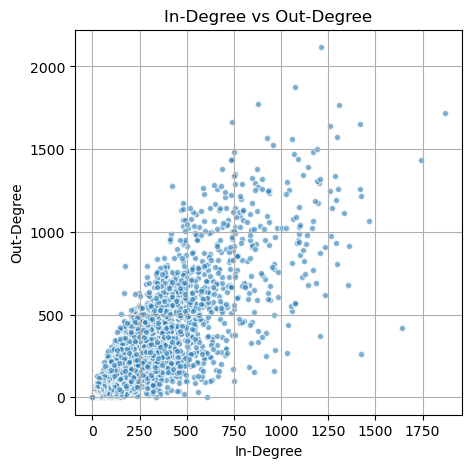

In [29]:
plt.figure(figsize=(5, 5))
plt.scatter(in_degrees, out_degrees, alpha=0.6, edgecolors='w', s=20)
plt.title('In-Degree vs Out-Degree')
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.show()

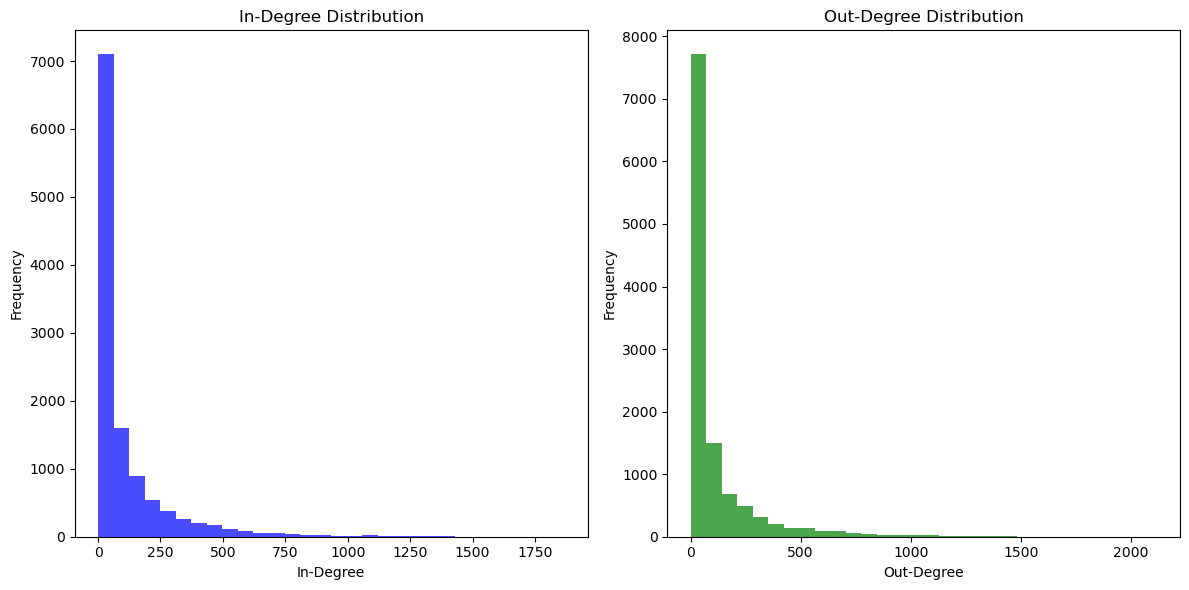

In [ ]:

# Plot in-degree distribution
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(in_degrees, bins=30, color='blue', alpha=0.7)
plt.title('In-Degree Distribution')
plt.xlabel('In-Degree')
plt.ylabel('Frequency')

# Plot out-degree distribution
plt.subplot(1, 2, 2)
plt.hist(out_degrees, bins=30, color='green', alpha=0.7)
plt.title('Out-Degree Distribution')
plt.xlabel('Out-Degree')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

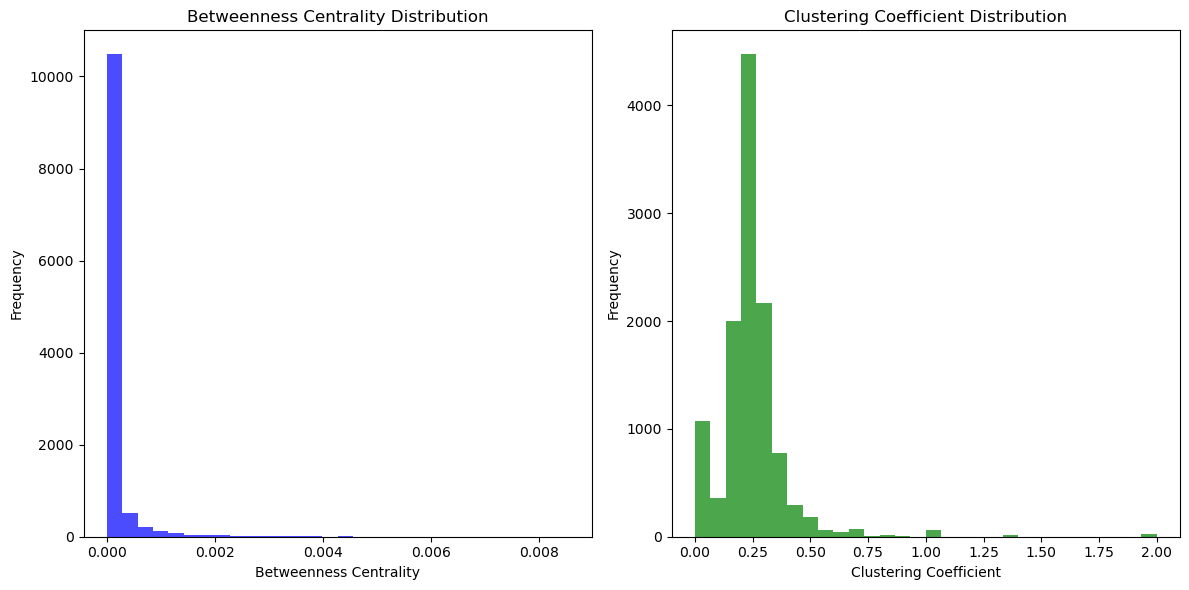

In [25]:
vertex_betweenness, edge_betweenness = betweenness(g)

clustering_coeffs = local_clustering(g)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(vertex_betweenness.a, bins=30, color='blue', alpha=0.7)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

# Plot clustering coefficient distribution
plt.subplot(1, 2, 2)
plt.hist(clustering_coeffs.a, bins=30, color='green', alpha=0.7)
plt.title('Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()